In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
ds = pd.read_csv("model.csv")
ds

,id,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target
0,1,Female,44,1,M,30,No,1-2 Year,Yes,25741,154,152,0
1,2,Male,23,1,M,3,Yes,< 1 Year,No,2630,152,256,0
2,3,Male,43,1,C,28,No,1-2 Year,Yes,70720,52,224,0
3,4,Male,60,1,B,28,Yes,1-2 Year,No,48512,26,86,0
4,5,Female,42,1,B,46,No,1-2 Year,Yes,32169,124,132,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102346,102347,Female,25,1,B,32,Yes,< 1 Year,No,34695,152,133,0
102347,102348,Female,47,1,M,28,No,1-2 Year,Yes,30564,26,114,1
102348,102349,Male,72,1,M,8,No,> 2 Years,Yes,52844,124,92,1
102349,102350,Female,25,1,M,11,Yes,< 1 Year,No,26343,152,127,0


In [62]:
print(ds.shape)

(102351, 13)


# Data Cleaning

In [63]:
#We checked there is no duplicated data in the dataset

ds.duplicated().sum()

0

In [64]:
#Then we checked about the null values in the data
ds.iat[0,0]
ds.isnull().sum()

id                         0
Gender                     0
Age                        0
Driving_License            0
Licence_Type            5091
Region_Code                0
Previously_Insured         0
Vehicle_Age                0
Vehicle_Damage             0
Annual_Premium             0
Policy_Sales_Channel       0
Seniority                  0
Target                     0
dtype: int64

In [65]:
#To try to see if there is a reason for this Nulls we ran a cross check between Driving License = 0
ds["Driving_License"]
print (ds.loc[ds['Driving_License'] == 0])

            id  Gender  Age  Driving_License Licence_Type  Region_Code  \
44          45  Female   48                0          NaN            3   
49          50  Female   22                0          NaN            3   
67          68  Female   49                0          NaN           28   
98          99  Female   28                0          NaN           10   
110        111  Female   47                0          NaN           41   
...        ...     ...  ...              ...          ...          ...   
102217  102218  Female   70                0          NaN           36   
102224  102225  Female   23                0          NaN            6   
102225  102226  Female   44                0          NaN           29   
102293  102294    Male   34                0          NaN           32   
102332  102333    Male   30                0          NaN           41   

       Previously_Insured Vehicle_Age Vehicle_Damage  Annual_Premium  \
44                     No    1-2 Year  

In [66]:
#We saw that the null values correspond to people who do not have a driving licence
#From that, the approach was to replace the values and not delete them

#We created a dataset in between to treat variables before the final dataset
fff = ds

In [67]:
#We replaced the nulls with the string 0
fff["Licence_Type"].fillna("0", inplace= True)

In [68]:
fff['Licence_Type'].value_counts()

C    19835
M    19686
D    19566
B    19306
A    18867
0     5091
Name: Licence_Type, dtype: int64

In [69]:
fff['Driving_License'].value_counts()

1    97260
0     5091
Name: Driving_License, dtype: int64

In [70]:
print (fff.loc[fff['Driving_License'] == 0])

            id  Gender  Age  Driving_License Licence_Type  Region_Code  \
44          45  Female   48                0            0            3   
49          50  Female   22                0            0            3   
67          68  Female   49                0            0           28   
98          99  Female   28                0            0           10   
110        111  Female   47                0            0           41   
...        ...     ...  ...              ...          ...          ...   
102217  102218  Female   70                0            0           36   
102224  102225  Female   23                0            0            6   
102225  102226  Female   44                0            0           29   
102293  102294    Male   34                0            0           32   
102332  102333    Male   30                0            0           41   

       Previously_Insured Vehicle_Age Vehicle_Damage  Annual_Premium  \
44                     No    1-2 Year  

# Deeply understanding the variables

In [71]:
#Creating a categorical dataset
fff.dtypes

id                       int64
Gender                  object
Age                      int64
Driving_License          int64
Licence_Type            object
Region_Code              int64
Previously_Insured      object
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel     int64
Seniority                int64
Target                   int64
dtype: object

In [72]:
cdf = ds.select_dtypes(include=['object'])
cdf

,Gender,Licence_Type,Previously_Insured,Vehicle_Age,Vehicle_Damage
0,Female,M,No,1-2 Year,Yes
1,Male,M,Yes,< 1 Year,No
2,Male,C,No,1-2 Year,Yes
3,Male,B,Yes,1-2 Year,No
4,Female,B,No,1-2 Year,Yes
...,...,...,...,...,...
102346,Female,B,Yes,< 1 Year,No
102347,Female,M,No,1-2 Year,Yes
102348,Male,M,No,> 2 Years,Yes
102349,Female,M,Yes,< 1 Year,No


In [73]:
cdf.dtypes

Gender                object
Licence_Type          object
Previously_Insured    object
Vehicle_Age           object
Vehicle_Damage        object
dtype: object

In [74]:
cdf['Licence_Type'].value_counts()

C    19835
M    19686
D    19566
B    19306
A    18867
0     5091
Name: Licence_Type, dtype: int64

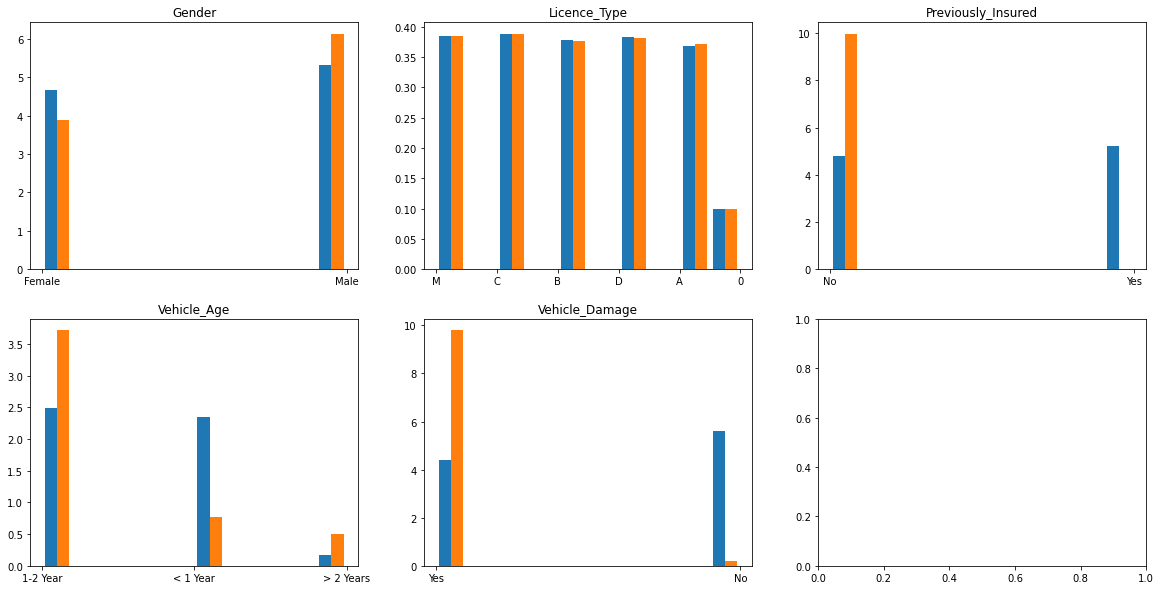

In [75]:
#Created graphs to see the variation of the descriptive variables and their impact on the target depending on their value

df_0=cdf[fff['Target']==0] # records wih target==0
df_1=cdf[fff['Target']==1] # records wih target==1


fig, axes = plt.subplots(2, 3,figsize=[20,10])
axes = axes.flatten()
i=0
for x in cdf.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist([df_0[x],df_1[x]],density=True)
    plt.title(x)
    i+=1
plt.show()

In [76]:
#Numerical dataset
ndf = fff.select_dtypes(include=['int64','float64'])
ndf


,id,Age,Driving_License,Region_Code,Annual_Premium,Policy_Sales_Channel,Seniority,Target
0,1,44,1,30,25741,154,152,0
1,2,23,1,3,2630,152,256,0
2,3,43,1,28,70720,52,224,0
3,4,60,1,28,48512,26,86,0
4,5,42,1,46,32169,124,132,0
...,...,...,...,...,...,...,...,...
102346,102347,25,1,32,34695,152,133,0
102347,102348,47,1,28,30564,26,114,1
102348,102349,72,1,8,52844,124,92,1
102349,102350,25,1,11,26343,152,127,0


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Driving_License'}>],
       [<AxesSubplot:title={'center':'Region_Code'}>,
        <AxesSubplot:title={'center':'Annual_Premium'}>,
        <AxesSubplot:title={'center':'Policy_Sales_Channel'}>],
       [<AxesSubplot:title={'center':'Seniority'}>,
        <AxesSubplot:title={'center':'Target'}>, <AxesSubplot:>]],
      dtype=object)

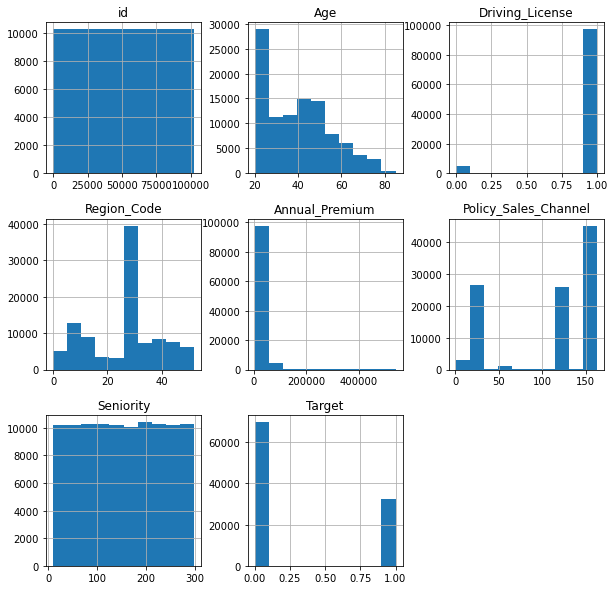

In [18]:
ndf.hist(figsize=(10,10))
#ndf.columns

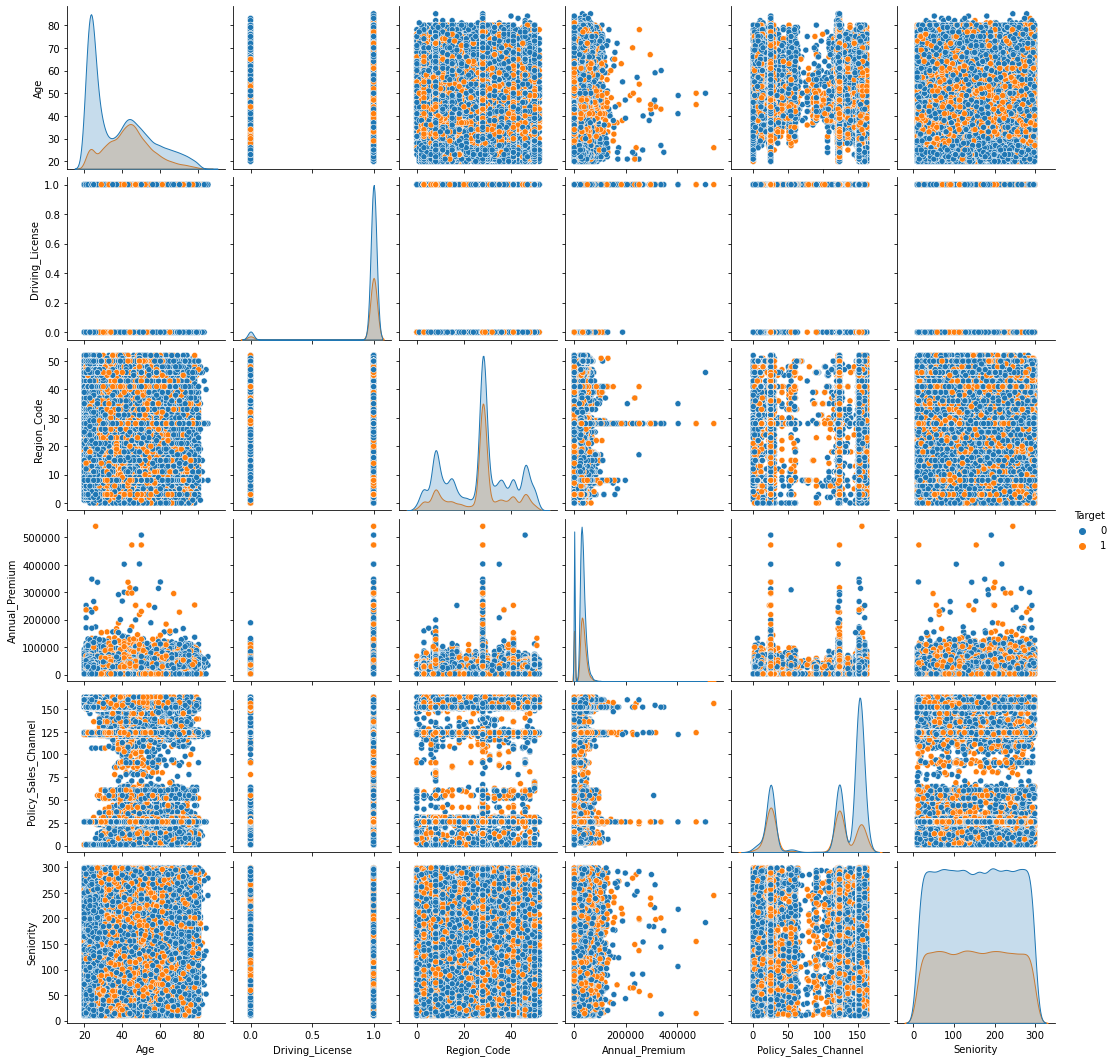

In [19]:
sns.pairplot(ndf[['Age', 'Driving_License', 'Region_Code', 'Annual_Premium','Policy_Sales_Channel', 'Seniority','Target']], hue='Target')

In [77]:
#After checking the graphs and the numerical variables, we decided to apply a log to the variables Annual_Premium and PolicySales
#this in order to have a better distribution

import math
pd.options.mode.chained_assignment = None

#ndf['logcampaign']=ndf['Age'].apply(math.log)
ndf['logAnnual_premium']=ndf['Annual_Premium'].apply(math.log)
ndf['PoliciesLog']=ndf['Policy_Sales_Channel'].apply(lambda x: math.log(x+1))

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Driving_License'}>],
       [<AxesSubplot:title={'center':'Region_Code'}>,
        <AxesSubplot:title={'center':'Annual_Premium'}>,
        <AxesSubplot:title={'center':'Policy_Sales_Channel'}>],
       [<AxesSubplot:title={'center':'Seniority'}>,
        <AxesSubplot:title={'center':'Target'}>,
        <AxesSubplot:title={'center':'logAnnual_premium'}>],
       [<AxesSubplot:title={'center':'PoliciesLog'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

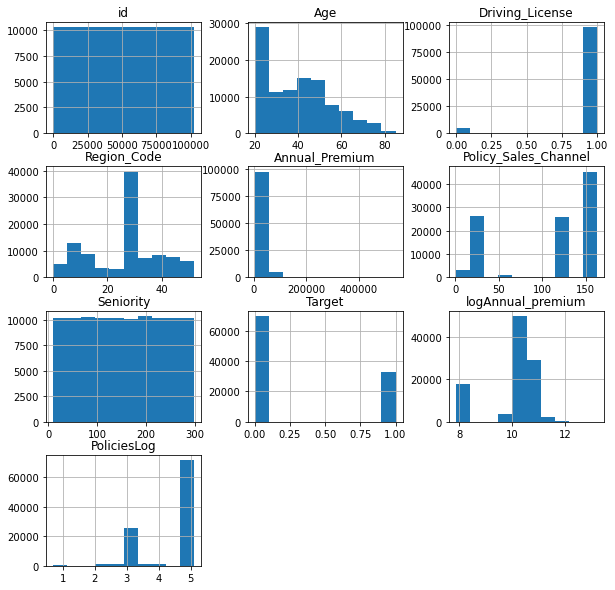

In [21]:
ndf.hist(figsize=(10,10))

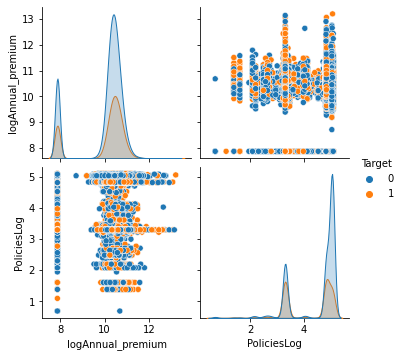

In [22]:
sns.pairplot(ndf[['logAnnual_premium',"PoliciesLog",'Target']], hue='Target')

In [78]:
#We can see that the variables edited seem better fitted for the model
fff['logAnnual_premium']=fff['Annual_Premium'].apply(math.log)
fff['PoliciesLog']=fff['Policy_Sales_Channel'].apply(lambda x: math.log(x+1))
fff

,id,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target,logAnnual_premium,PoliciesLog
0,1,Female,44,1,M,30,No,1-2 Year,Yes,25741,154,152,0,10.155840,5.043425
1,2,Male,23,1,M,3,Yes,< 1 Year,No,2630,152,256,0,7.874739,5.030438
2,3,Male,43,1,C,28,No,1-2 Year,Yes,70720,52,224,0,11.166484,3.970292
3,4,Male,60,1,B,28,Yes,1-2 Year,No,48512,26,86,0,10.789566,3.295837
4,5,Female,42,1,B,46,No,1-2 Year,Yes,32169,124,132,0,10.378759,4.828314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102346,102347,Female,25,1,B,32,Yes,< 1 Year,No,34695,152,133,0,10.454351,5.030438
102347,102348,Female,47,1,M,28,No,1-2 Year,Yes,30564,26,114,1,10.327578,3.295837
102348,102349,Male,72,1,M,8,No,> 2 Years,Yes,52844,124,92,1,10.875099,4.828314
102349,102350,Female,25,1,M,11,Yes,< 1 Year,No,26343,152,127,0,10.178958,5.030438


In [79]:
#We rescaled the variables that are not between 0-1

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
fff[["logAnnual_premium", "PoliciesLog", "Age","Region_Code"]] = scaler.fit_transform(fff[["logAnnual_premium", "PoliciesLog", "Age","Region_Code"]])
fff.head()

,id,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target,logAnnual_premium,PoliciesLog
0,1,Female,0.369231,1,M,0.576923,No,1-2 Year,Yes,25741,154,152,0,0.428385,0.987192
1,2,Male,0.046154,1,M,0.057692,Yes,< 1 Year,No,2630,152,256,0,0.000000,0.984245
2,3,Male,0.353846,1,C,0.538462,No,1-2 Year,Yes,70720,52,224,0,0.618181,0.743670
3,4,Male,0.615385,1,B,0.538462,Yes,1-2 Year,No,48512,26,86,0,0.547397,0.590618
4,5,Female,0.338462,1,B,0.884615,No,1-2 Year,Yes,32169,124,132,0,0.470248,0.938378


In [80]:
#After checking values, we decided to drop Seniority, Licence_type and Driving_License

# Last steps of data cleaning


In [81]:
#Created dummies for categorical variables
replace_map = {'Vehicle_Age': {'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2}}
fff = fff.replace("Male", 1)
fff = fff.replace("Female", 0)
fff = fff.replace("No", 0)
fff = fff.replace("Yes", 1)

In [82]:
fff.replace(replace_map, inplace=True)


In [83]:
fff.drop('id', axis=1, inplace=True)
fff.drop('Driving_License', axis=1, inplace=True)
fff.drop('Licence_Type', axis=1, inplace=True)
fff.drop('Seniority', axis=1, inplace=True)
fff.drop('Annual_Premium', axis=1, inplace=True)
fff.drop('Policy_Sales_Channel', axis=1, inplace=True)

In [84]:
print(fff.head())
fds = fff

   Gender       Age  Region_Code  Previously_Insured  Vehicle_Age  \
0       0  0.369231     0.576923                   0            1   
1       1  0.046154     0.057692                   1            0   
2       1  0.353846     0.538462                   0            1   
3       1  0.615385     0.538462                   1            1   
4       0  0.338462     0.884615                   0            1   

   Vehicle_Damage  Target  logAnnual_premium  PoliciesLog  
0               1       0           0.428385     0.987192  
1               0       0           0.000000     0.984245  
2               1       0           0.618181     0.743670  
3               0       0           0.547397     0.590618  
4               1       0           0.470248     0.938378  


In [85]:
#As for the dataset cleaned we have to take into consideration this:

#In Gender, 0 is female and 1 is male


#In vehicle Age, 0 means less than a year, 1 = 1-2 years and 2 is for more than 2 years

#  Data visualization and Variable understanding

<AxesSubplot:>

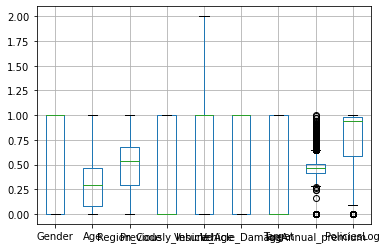

In [86]:
%matplotlib inline
fds.boxplot()

In [87]:
fds.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Target,logAnnual_premium,PoliciesLog
0,0,0.369231,0.576923,0,1,1,0,0.428385,0.987192
1,1,0.046154,0.057692,1,0,0,0,0.000000,0.984245
2,1,0.353846,0.538462,0,1,1,0,0.618181,0.743670
3,1,0.615385,0.538462,1,1,0,0,0.547397,0.590618
4,0,0.338462,0.884615,0,1,1,0,0.470248,0.938378


In [88]:
#We reordered the variables with the logs

fds = fds[['Gender',
 'Age',
 'Region_Code',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'logAnnual_premium',
 'PoliciesLog',
 'Target']]
fds

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,logAnnual_premium,PoliciesLog,Target
0,0,0.369231,0.576923,0,1,1,0.428385,0.987192,0
1,1,0.046154,0.057692,1,0,0,0.000000,0.984245,0
2,1,0.353846,0.538462,0,1,1,0.618181,0.743670,0
3,1,0.615385,0.538462,1,1,0,0.547397,0.590618,0
4,0,0.338462,0.884615,0,1,1,0.470248,0.938378,0
...,...,...,...,...,...,...,...,...,...
102346,0,0.076923,0.615385,1,0,0,0.484444,0.984245,0
102347,0,0.415385,0.538462,0,1,1,0.460636,0.590618,1
102348,1,0.800000,0.153846,0,2,1,0.563460,0.938378,1
102349,0,0.076923,0.211538,1,0,0,0.432726,0.984245,0


<AxesSubplot:>

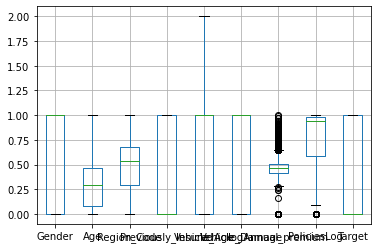

In [89]:
%matplotlib inline
fds.boxplot()

In [90]:
#Separate X and y (explanatory variables and target variable)
x = fds.iloc[:,0:-1]
y = fds.iloc[:,-1] #[-1]]

x.head()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
#We splitted the model for training and for test

x_train, x_test, y_train, y_test = train_test_split(x,y, 
                                                   test_size = 0.25,
                                                    stratify=y,
                                                    random_state= 123
                                                   )
x_train

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,logAnnual_premium,PoliciesLog
41743,1,0.353846,0.884615,0,1,1,0.464673,0.938378
75477,1,0.169231,0.538462,0,0,1,0.580690,0.984245
78168,1,0.538462,0.153846,0,1,1,0.000000,0.590618
68980,0,0.461538,0.750000,0,1,1,0.000000,0.938378
1050,0,0.661538,0.538462,0,1,1,0.530068,0.934717
...,...,...,...,...,...,...,...,...
33262,1,0.584615,0.788462,0,2,1,0.546228,0.938378
6180,0,0.846154,0.115385,0,1,1,0.479236,0.590618
22249,1,0.292308,0.153846,1,1,0,0.503449,0.938378
11341,1,0.184615,0.153846,0,0,1,0.624253,0.938378


## KNN model

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

In [94]:
#Create KNN Classifier
knn3 = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn3.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = knn3.predict(x_test)

In [95]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [96]:
print(confusion_matrix(y_test, y_pred))

[[14040  3430]
 [ 3343  4775]]


In [97]:
print('***RESULTS ON TEST SET***')
print("F1_score: ",metrics.f1_score(y_test, y_pred))
print("Accuracy",metrics.accuracy_score(y_test, y_pred))
print("Recall",metrics.recall_score(y_test, y_pred))



print(classification_report(y_test, y_pred))

***RESULTS ON TEST SET***
F1_score:  0.5850640200943455
Accuracy 0.7353056120056276
Recall 0.5881990638088199
              precision    recall  f1-score   support

           0       0.81      0.80      0.81     17470
           1       0.58      0.59      0.59      8118

    accuracy                           0.74     25588
   macro avg       0.69      0.70      0.70     25588
weighted avg       0.74      0.74      0.74     25588



## Decision Tree

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, min_samples_leaf=2)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [100]:
print(confusion_matrix(y_test, y_pred))

[[13767  3703]
 [ 2280  5838]]


In [101]:
print('***RESULTS ON TEST SET***')
print("F1_score: ",metrics.f1_score(y_test, y_pred))
print("Accuracy",metrics.accuracy_score(y_test, y_pred))
print("Recall",metrics.recall_score(y_test, y_pred))



print(classification_report(y_test, y_pred))

***RESULTS ON TEST SET***
F1_score:  0.6611925930120618
Accuracy 0.7661794591214632
Recall 0.7191426459719142
              precision    recall  f1-score   support

           0       0.86      0.79      0.82     17470
           1       0.61      0.72      0.66      8118

    accuracy                           0.77     25588
   macro avg       0.73      0.75      0.74     25588
weighted avg       0.78      0.77      0.77     25588



In [102]:
#y_pred = model.predict(x_train)

In [103]:
#Checking if the model is overfitted or not.
#print("Accuracy",metrics.accuracy_score(y_train, y_pred))

In [104]:
#We can see that the model is not overfitted, so is returning true raw values

# Random Forrest final model

In [110]:
#Random forrest
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=300, criterion='entropy', max_depth=10, min_samples_split=7, 
                                     min_samples_leaf=8)
#rand_forest = RandomForestClassifier()
rand_forest.fit(x_train, y_train)

y_pred = rand_forest.predict(x_test)


In [111]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13455  4015]
 [ 1804  6314]]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82     17470
           1       0.61      0.78      0.68      8118

    accuracy                           0.77     25588
   macro avg       0.75      0.77      0.75     25588
weighted avg       0.80      0.77      0.78     25588



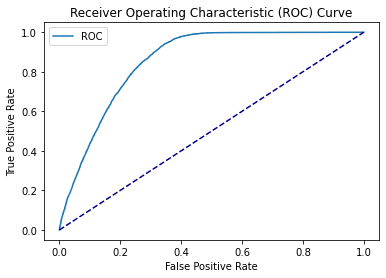

AUC: 0.86


In [112]:
from sklearn import metrics

y_probs = rand_forest.predict_proba(x_test) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

# Running the new csv and predict

In [57]:
pred_ds = pd.read_csv("prediction_independent.csv")

In [116]:
pred_ds.shape

(45196, 8)

In [59]:
pred_ds["Licence_Type"].fillna("0", inplace= True)
pred_ds['logAnnual_premium']=ndf['Annual_Premium'].apply(math.log)
pred_ds['PoliciesLog']=ndf['Policy_Sales_Channel'].apply(lambda x: math.log(x+1))
scaler = MinMaxScaler()
pred_ds[["logAnnual_premium", "PoliciesLog", "Age","Region_Code"]] = scaler.fit_transform(pred_ds[["logAnnual_premium", "PoliciesLog", "Age","Region_Code"]])
pred_ds.head()


,id,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,logAnnual_premium,PoliciesLog
0,1,Male,0.484375,1,M,0.538462,No,1-2 Year,Yes,45301,26,31,0.439511,0.987192
1,2,Male,0.671875,1,B,0.750000,No,1-2 Year,Yes,18609,124,28,0.000000,0.984245
2,3,Male,0.875000,1,M,0.730769,No,1-2 Year,Yes,35081,26,164,0.634237,0.743670
3,4,Female,0.281250,1,B,0.788462,No,1-2 Year,Yes,19603,124,33,0.561615,0.590618
4,5,Female,0.015625,1,D,0.576923,Yes,< 1 Year,No,27842,160,28,0.482462,0.938378


In [60]:
replace_map = {'Vehicle_Age': {'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2}}
pred_ds = pred_ds.replace("Male", 1)
pred_ds = pred_ds.replace("Female", 0)
pred_ds = pred_ds.replace("No", 0)
pred_ds = pred_ds.replace("Yes", 1)
pred_ds.replace(replace_map, inplace=True)
pred_ds.drop('id', axis=1, inplace=True)
pred_ds.drop('Driving_License', axis=1, inplace=True)
pred_ds.drop('Licence_Type', axis=1, inplace=True)
pred_ds.drop('Seniority', axis=1, inplace=True)
pred_ds.drop('Annual_Premium', axis=1, inplace=True)
pred_ds.drop('Policy_Sales_Channel', axis=1, inplace=True)
pred_ds.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,logAnnual_premium,PoliciesLog
0,1,0.484375,0.538462,0,1,1,0.439511,0.987192
1,1,0.671875,0.750000,0,1,1,0.000000,0.984245
2,1,0.875000,0.730769,0,1,1,0.634237,0.743670
3,0,0.281250,0.788462,0,1,1,0.561615,0.590618
4,0,0.015625,0.576923,1,0,0,0.482462,0.938378


In [113]:
f_pred = rand_forest.predict(pred_ds)

In [125]:
pd.DataFrame(f_pred).to_csv("C:/Users/juanp/Desktop/MIP/Machine Learning/classification_assignment/Prediction.csv")

In [130]:
prediction = pd.read_csv("Prediction.csv")

In [131]:
prediction.head()

,Target
0,1
1,0
2,0
3,1
4,0
